In [2]:
import numpy as np
import pylab as plt
import concurrent.futures



In [3]:
lattice = 8

particle_site = 40

state0= particle_site*np.ones(lattice)

def pos_state0(state):
    pos_state0=[]
    for i in range(1):
        pos_state0.append(state)
    return pos_state0

M = pos_state0(state0)

print(M)

[array([40., 40., 40., 40., 40., 40., 40., 40.])]


In [4]:
def d_dag(l, state):
    d0 = np.zeros(lattice)
    d0[l] = -1.
    if l < len(d0) - 1:
        d0[l + 1] = 1.
    else:
        d0[0] = 1.  # Consider the first element as the next for the last element

    return d0 + state


def d(l,state):
    d0= np.zeros(lattice)
    d0[l]= 1.
    if l<len(d0)-1:
        d0[l+1]= -1.
    if l==len(d0)-1:
        d0[0]=-1.
    
    return d0+state


def pos_states(state):
    # all possible one dipole states cor. to d dag
    pos_state=[]
    for i in range(len(state)):
        pos_state.append(d_dag(i,state))
    
    return pos_state

In [5]:
B = pos_states(state0)

print(len(B))
print(B)

8
[array([39., 41., 40., 40., 40., 40., 40., 40.]), array([40., 39., 41., 40., 40., 40., 40., 40.]), array([40., 40., 39., 41., 40., 40., 40., 40.]), array([40., 40., 40., 39., 41., 40., 40., 40.]), array([40., 40., 40., 40., 39., 41., 40., 40.]), array([40., 40., 40., 40., 40., 39., 41., 40.]), array([40., 40., 40., 40., 40., 40., 39., 41.]), array([41., 40., 40., 40., 40., 40., 40., 39.])]


In [6]:
def pos_states2(state):

    pos_state2 = []
    added_states = set()

    for i in range(len(state)):
        state1 = d_dag(i, state)

        for j in range(len(state)):
            if np.abs(i - j) >= 2.0 and np.abs(i - j) <=  lattice -2:
                state2 = d_dag(j, state1)

                # Check if state2 has already been added
                state2_tuple = tuple(state2)
                if state2_tuple not in added_states:
                    added_states.add(state2_tuple)
                    pos_state2.append(state2)

    return pos_state2


In [7]:
print(len(pos_states2(state0)))
print(pos_states2(state0))

20
[array([39., 41., 39., 41., 40., 40., 40., 40.]), array([39., 41., 40., 39., 41., 40., 40., 40.]), array([39., 41., 40., 40., 39., 41., 40., 40.]), array([39., 41., 40., 40., 40., 39., 41., 40.]), array([39., 41., 40., 40., 40., 40., 39., 41.]), array([40., 39., 41., 39., 41., 40., 40., 40.]), array([40., 39., 41., 40., 39., 41., 40., 40.]), array([40., 39., 41., 40., 40., 39., 41., 40.]), array([40., 39., 41., 40., 40., 40., 39., 41.]), array([41., 39., 41., 40., 40., 40., 40., 39.]), array([40., 40., 39., 41., 39., 41., 40., 40.]), array([40., 40., 39., 41., 40., 39., 41., 40.]), array([40., 40., 39., 41., 40., 40., 39., 41.]), array([41., 40., 39., 41., 40., 40., 40., 39.]), array([40., 40., 40., 39., 41., 39., 41., 40.]), array([40., 40., 40., 39., 41., 40., 39., 41.]), array([41., 40., 40., 39., 41., 40., 40., 39.]), array([40., 40., 40., 40., 39., 41., 39., 41.]), array([41., 40., 40., 40., 39., 41., 40., 39.]), array([41., 40., 40., 40., 40., 39., 41., 39.])]


In [8]:
def pos_states3(state):

    pos_state3 = []
    added_states = set()

    for i in range(len(state)):
        state1 = d_dag(i, state)

        for j in range(len(state)):
            if np.abs(i - j) >= 2.0 and np.abs(i - j) <= lattice-2:
                state2 = d_dag(j, state1)

                for k in range(len(state)):
                    if np.abs(j-k) >= 2.0 and np.abs(j-k) <=lattice - 2:
                        if np.abs(i-k) >= 2.0 and np.abs(i-k) <=lattice - 2:
                            state3 = d_dag(k,state2)

                            # Check if state2 is not an array of zeros
                            if not np.all(state3 == 0):
                                state3_tuple = tuple(state3)
                                if state3_tuple not in added_states:
                                    added_states.add(state3_tuple)
                                    pos_state3.append(state3)

    return pos_state3


In [9]:
D3 = pos_states3(state0)

print(len(D3))
print(D3)

16
[array([39., 41., 39., 41., 39., 41., 40., 40.]), array([39., 41., 39., 41., 40., 39., 41., 40.]), array([39., 41., 39., 41., 40., 40., 39., 41.]), array([39., 41., 40., 39., 41., 39., 41., 40.]), array([39., 41., 40., 39., 41., 40., 39., 41.]), array([39., 41., 40., 40., 39., 41., 39., 41.]), array([40., 39., 41., 39., 41., 39., 41., 40.]), array([40., 39., 41., 39., 41., 40., 39., 41.]), array([41., 39., 41., 39., 41., 40., 40., 39.]), array([40., 39., 41., 40., 39., 41., 39., 41.]), array([41., 39., 41., 40., 39., 41., 40., 39.]), array([41., 39., 41., 40., 40., 39., 41., 39.]), array([40., 40., 39., 41., 39., 41., 39., 41.]), array([41., 40., 39., 41., 39., 41., 40., 39.]), array([41., 40., 39., 41., 40., 39., 41., 39.]), array([41., 40., 40., 39., 41., 39., 41., 39.])]


In [10]:
def pos_states4(state):

    pos_state4 = []
    added_states = set()

    for i in range(len(state)):
        state1 = d_dag(i, state)

        for j in range(len(state)):
            if np.abs(i - j) >= 2.0 and np.abs(i - j) <= lattice-2:
                state2 = d_dag(j, state1)

                for k in range(len(state)):
                    if np.abs(j-k) >= 2.0 and np.abs(j-k) <=lattice - 2:
                        if np.abs(i-k) >= 2.0 and np.abs(i-k) <=lattice - 2:
                            state3 = d_dag(k,state2)

                            for m in range(len(state)):
                                if np.abs(k-m) >= 2.0 and np.abs(k-m) <=lattice - 2:
                                    if np.abs(j-m) >= 2.0 and np.abs(j-m) <=lattice - 2:
                                        if np.abs(i-m) >= 2.0 and np.abs(i-m) <=lattice - 2:
                                            state4 = d_dag(m,state3)


                                            # Check if state2 has already been added
                                            state4_tuple = tuple(state4)
                                            if state4_tuple not in added_states:
                                                added_states.add(state4_tuple)
                                                pos_state4.append(state4)

    return pos_state4


In [11]:
D4 = pos_states4(state0)

print(len(D4))
print(D4)

2
[array([39., 41., 39., 41., 39., 41., 39., 41.]), array([41., 39., 41., 39., 41., 39., 41., 39.])]


In [12]:
#A = [state0 , pos_states(state0) , pos_states2(state0), pos_states3(state0), pos_states4(state0)]
import itertools

A = list(itertools.chain.from_iterable((pos_state0(state0), pos_states(state0), pos_states2(state0), pos_states3(state0), pos_states4(state0))))

print(len(A))
print(A)

47
[array([40., 40., 40., 40., 40., 40., 40., 40.]), array([39., 41., 40., 40., 40., 40., 40., 40.]), array([40., 39., 41., 40., 40., 40., 40., 40.]), array([40., 40., 39., 41., 40., 40., 40., 40.]), array([40., 40., 40., 39., 41., 40., 40., 40.]), array([40., 40., 40., 40., 39., 41., 40., 40.]), array([40., 40., 40., 40., 40., 39., 41., 40.]), array([40., 40., 40., 40., 40., 40., 39., 41.]), array([41., 40., 40., 40., 40., 40., 40., 39.]), array([39., 41., 39., 41., 40., 40., 40., 40.]), array([39., 41., 40., 39., 41., 40., 40., 40.]), array([39., 41., 40., 40., 39., 41., 40., 40.]), array([39., 41., 40., 40., 40., 39., 41., 40.]), array([39., 41., 40., 40., 40., 40., 39., 41.]), array([40., 39., 41., 39., 41., 40., 40., 40.]), array([40., 39., 41., 40., 39., 41., 40., 40.]), array([40., 39., 41., 40., 40., 39., 41., 40.]), array([40., 39., 41., 40., 40., 40., 39., 41.]), array([41., 39., 41., 40., 40., 40., 40., 39.]), array([40., 40., 39., 41., 39., 41., 40., 40.]), array([40., 40.,

In [13]:
def matrix_element(state1,state2):
    q1=0
    q2=0

    
    if (state1 == state2).all() :
        q1 = np.count_nonzero(state1 == particle_site - 1) 
            
    return q1






In [14]:
N = len(A)
H = np.zeros((N, N), dtype=float)

for i in range(N):
    for j in range(N):
        H[i,j] = matrix_element(A[i],A[j])

print(H)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 3. 0. 0.]
 [0. 0. 0. ... 0. 4. 0.]
 [0. 0. 0. ... 0. 0. 4.]]


In [17]:
def d_dag_matrix_element(state1, state2):
    # Check if states are related by d_dag operator
    w = 1

    for l in range(len(state1)):
        if np.array_equal(d_dag(l, state1), state2):
            return -w * np.sqrt(2)
    return 0



N = len(A)
H = np.zeros((N, N), dtype=float)

# Parameters
w = 1.0  # Hopping amplitude
U = 1.0  # On-site interaction strength
E = 0.0  # Energy offset
n0 = 1  # Average particle density per site

# Parameters
lambda_values = np.linspace(-6, 6, 200)

# Lists to store eigenvalues for each lambda
eigenvalues_list = []
diff_list = []

# Loop through lambda values
for lambda_val in lambda_values:
    for i in range(N):
            for j in range(N):
                # Diagonal elements
                if i == j:
                    H[i, j] = lambda_val * matrix_element(A[i], A[j])
                else:
                    # Off-diagonal elements
                    H[i, j] = d_dag_matrix_element(A[i], A[j]) + d_dag_matrix_element(A[j], A[i])


 
    e_vals, _ = np.linalg.eigh(H) 
    eigenvalues_list.append(e_vals)

    diff_eigenvalues = e_vals[1] - e_vals[0]
    
# Append the difference to the list
    diff_list.append(diff_eigenvalues)


print(H)


[[ 0.         -1.41421356 -1.41421356 ...  0.          0.
   0.        ]
 [-1.41421356  6.          0.         ...  0.          0.
   0.        ]
 [-1.41421356  0.          6.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... 18.          0.
  -1.41421356]
 [ 0.          0.          0.         ...  0.         24.
   0.        ]
 [ 0.          0.          0.         ... -1.41421356  0.
  24.        ]]


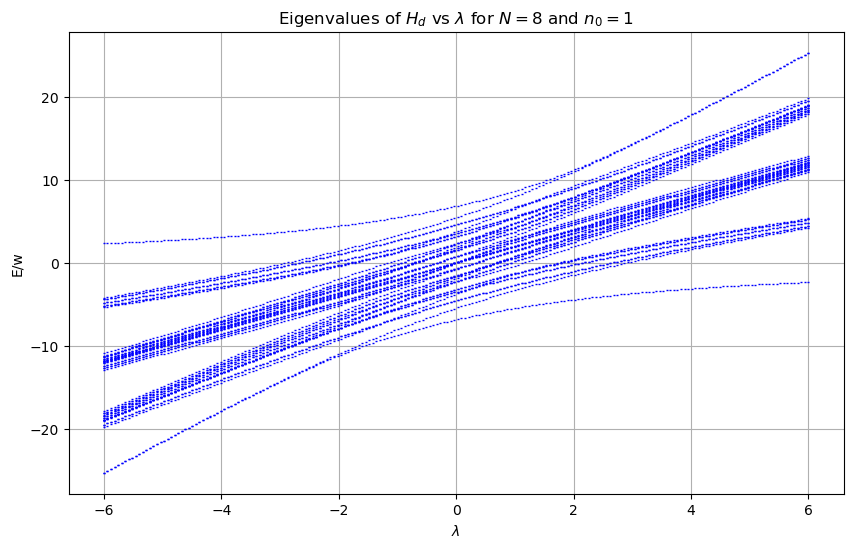

In [16]:
# Plot eigenvalues as a function of lambda
plt.figure(figsize=(10, 6))
for i in range(len(lambda_values)):
    eigenvalues = eigenvalues_list[i]
    plt.plot([lambda_values[i]] * len(eigenvalues), eigenvalues/w, '_', markersize=1, color='blue')
    

plt.xlabel(r'$\lambda$')
plt.ylabel('E/w')
plt.title('Eigenvalues of $H_d$ vs $\lambda$ for $N=8$ and $n_0 = 1$')
plt.grid(True)
plt.show()


In [19]:
def create_hamiltonian(N, A, lambda_val):
    H = np.zeros((N, N), dtype=float)
    for i in range(N):
        for j in range(N):
            if i == j:
                H[i, j] = lambda_val * matrix_element(A[i], A[j])
            else:
                H[i, j] = d_dag_matrix_element(A[i], A[j]) + d_dag_matrix_element(A[j], A[i])
    return H


In [26]:
from scipy.linalg import eigh_tridiagonal

def ground_state(H):
    eigenvals, eigenvecs =  np.linalg.eigh(H)
    idx = np.argsort(eigenvals)
    ground_state_index = idx[0]
    ground_state_wavefunction = eigenvecs[:, ground_state_index]
    return ground_state_wavefunction

def fidelity(state1, state2):
    return np.abs(np.dot(np.conj(state1), state2)) ** 2

def fidelity_susceptibility(state1, state2, delta_lambda):
    f1 = fidelity(state1, state2)
#    f2 = fidelity(state1, state1)
#    f3 = fidelity(state2, state2)
    return (-2 * np.log(f1)) / (delta_lambda ** 2)

# Define your system parameters and states here

# Range of lambda values to explore
lambda_values = np.linspace(-4.5, 4.5, 100)
delta_lambda = 0.0001  # Small change in lambda for fidelity susceptibility

# Lists to store fidelity susceptibilities for each lambda value
susceptibility_values = []
fidelity_values = []

# Loop through lambda values
for i in range(len(lambda_values) - 1):
    lambda_val = lambda_values[i]

    # Create Hamiltonians for current and next lambda values
    H = create_hamiltonian(N, A, lambda_val)
    next_H = create_hamiltonian(N, A, lambda_val+ delta_lambda)

    # Calculate ground states
    state1 = ground_state(H)
    state2 = ground_state(next_H)

    # Calculate fidelity susceptibility
    susceptibility = fidelity_susceptibility(state1, state2, delta_lambda)
    susceptibility_values.append(susceptibility)
    fidelity_val = fidelity(state1,state2)
    fidelity_values.append(fidelity_val)


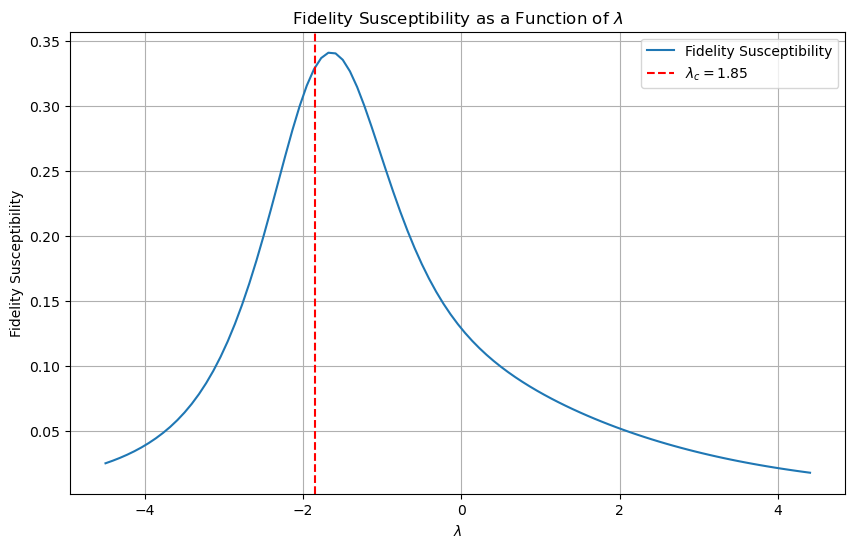

In [27]:
# Plotting the fidelity susceptibility as a function of lambda
plt.figure(figsize=(10, 6))
plt.plot(lambda_values[:-1], susceptibility_values, label='Fidelity Susceptibility')
#plt.plot(lambda_values[:-1], fidelity_values, label='Fidelity ')
plt.axvline(x=-1.85, color='r', linestyle='--', label='$λ_c=1.85$')
plt.xlabel(r'$\lambda$')
plt.ylabel('Fidelity Susceptibility')
plt.title('Fidelity Susceptibility as a Function of $\lambda$')
plt.legend()
plt.grid()
plt.show()

In [25]:
H1 = create_hamiltonian(N, A, -1)
H2 = create_hamiltonian(N, A, -1 + 0.005)

eigenvals1, eigenvecs1 = eigh_tridiagonal(H1.diagonal(), np.diag(H1, -1))
eigenvals2, eigenvecs2 = eigh_tridiagonal(H2.diagonal(), np.diag(H2, -1))

idx = np.argsort(eigenvals1)
ground_state_index = idx[0]
ground_state_energy1 = eigenvals1[ground_state_index]

idx2 = np.argsort(eigenvals2)
ground_state_index = idx2[0]
ground_state_energy2 = eigenvals2[ground_state_index]


print(ground_state_energy1, ground_state_energy2)

-4.0 -3.98


In [26]:
psig1 =  eigenvecs1[idx[0]]
psig2 = eigenvecs2[idx2[0]]
#np.sum(np.abs(psig1)**2)
#np.sum(np.abs(psig2)**2)
np.abs(np.sum(np.conj(psig1)*psig2))**2

0.44395020606720725

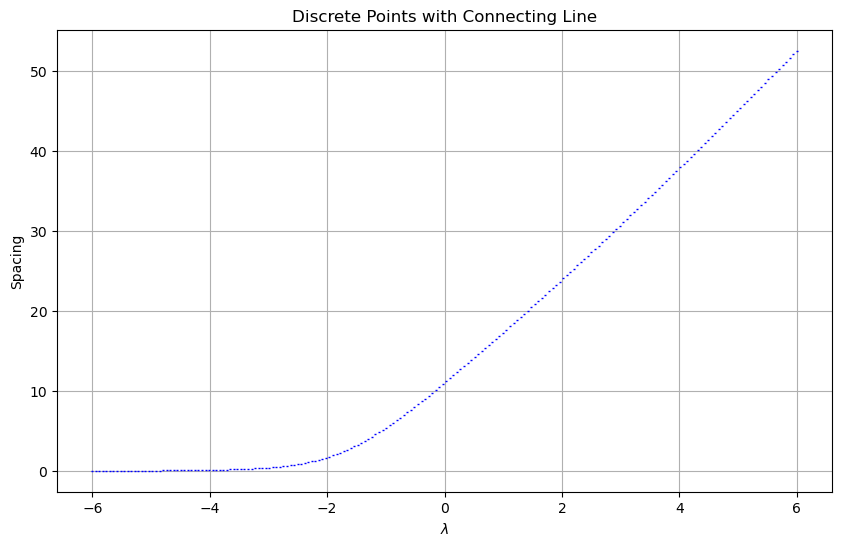

In [16]:
import matplotlib.pyplot as plt

# Plot with a line connecting the points
plt.figure(figsize=(10, 6))
for i in range(len(lambda_values)):
    spacing = diff_list[i]
    plt.plot(lambda_values[i], 8 * spacing / w, '_', markersize=1, color='blue')

    # Add a line connecting the points
#    if i > 0:
#        plt.plot([lambda_values[i - 1], lambda_values[i]], [8 * diff_list[i - 1] / w, 8 * spacing / w], color='blue', linestyle='-', linewidth=1)

#plt.xlim([-1.9, -1.8])
#plt.ylim([-0.1, 1.6])
plt.xlabel(r'$\lambda$')
plt.ylabel('Spacing')
plt.title('Discrete Points with Connecting Line')
plt.grid(True)
plt.show()


In [17]:
def matrix_element1(state1,state2):
    q1=0
    q2=0

    
    if (state1 == state2).all() :
        q1 = np.count_nonzero(state1 == particle_site - 1) 
            
    return (-1)**q1 * q1



N = len(A)
H1 = np.zeros((N, N), dtype=float)

# Parameters
w = 1.0  # Hopping amplitude
U = 1.0  # On-site interaction strength
E = 0.0  # Energy offset
n0 = 1  # Average particle density per site

# Parameters
lambda_values = np.linspace(-6, 6, 200)

# Lists to store eigenvalues for each lambda
eigenvalues_list = []
diff_list = []

# Loop through lambda values
for lambda_val in lambda_values:
    for i in range(N):
            for j in range(N):
                # Diagonal elements
                if i == j:
                    H1[i, j] = lambda_val * matrix_element1(A[i], A[j])**2

 
    e_vals, _ = np.linalg.eigh(H1) 
    eigenvalues_list.append(e_vals)

    diff_eigenvalues = e_vals[1] - e_vals[0]
    
# Append the difference to the list
    diff_list.append(diff_eigenvalues)


print(H1)


[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  6.  0. ...  0.  0.  0.]
 [ 0.  0.  6. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 54.  0.  0.]
 [ 0.  0.  0. ...  0. 96.  0.]
 [ 0.  0.  0. ...  0.  0. 96.]]


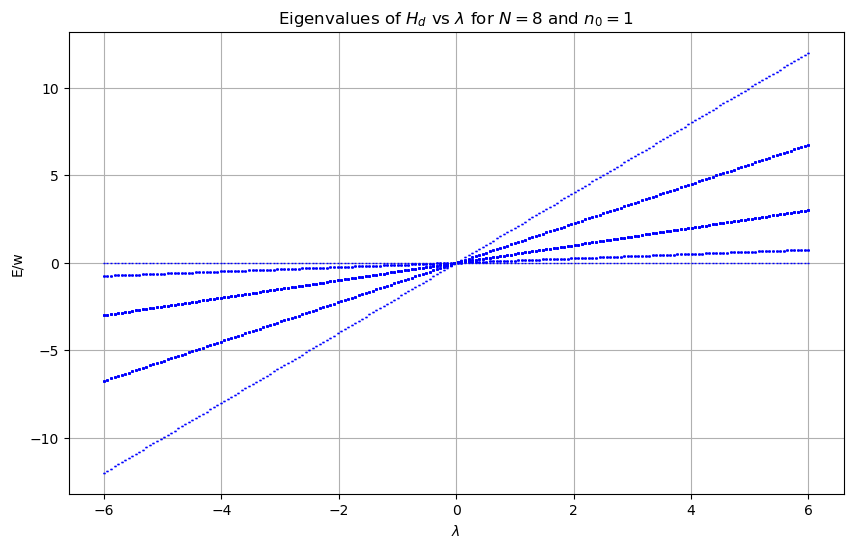

In [18]:
# Plot eigenvalues as a function of lambda
plt.figure(figsize=(10, 6))
for i in range(len(lambda_values)):
    eigenvalues = eigenvalues_list[i]
    plt.plot([lambda_values[i]] * len(eigenvalues), eigenvalues/8, '_', markersize=1, color='blue')
    

plt.xlabel(r'$\lambda$')
plt.ylabel('E/w')
plt.title('Eigenvalues of $H_d$ vs $\lambda$ for $N=8$ and $n_0 = 1$')
plt.grid(True)
plt.show()


In [19]:
def operator(particle,state):
    sum = 0
    for i in range(particle):
        sum = sum + (-1)**i*d_dag(i,state)*d(i,state)
    return sum

a = operator(particle_site,A[2])
print(a)


[ 0. -1.  4.  1.  1.  1.  1.  1.]


In [25]:
from qutip import tensor, destroy, qeye, jmat, steadystate, expect, Qobj
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Define constants and operators
N = 5  # Number of particles
spin = N / 2  # Total spin quantum number
M = N ** 2
n = 2 * spin + 1
sx = 2 * jmat(spin, 'x')
sz = 2 * jmat(spin, 'z')
sp = jmat(spin, '+')
sm = jmat(spin, '-')

N_dim = len(A)
dim = int(N_dim / 2)
a = Qobj(tensor(destroy(47)), dims=[[N_dim], [N_dim]])
Jp = Qobj(tensor(qeye(47), sp), dims=[[N_dim], [N_dim]])
Jm = Qobj(tensor(qeye(47), sm), dims=[[N_dim], [N_dim]])
Jz = Qobj(tensor(qeye(47), sz), dims=[[N_dim], [N_dim]])
adagger = a.dag()


t = 1.0  # Tunneling strength
U = 100.0  # Interaction strength
omega_cavity = 0.1  # Cavity frequency
g = 1  # Coupling strength
eta = 0.5  # Driving strength
adagger = a.dag()


# Generate the basis states
A = list(itertools.chain.from_iterable((pos_state0(state0), pos_states(state0), pos_states2(state0), pos_states3(state0), pos_states4(state0))))

def matrix_element(state1, state2):
    q1 = 0
    q2 = 0
    if (state1 == state2).all():
        q1 = np.count_nonzero(state1 == particle_site - 1)
    return q1

def d_dag_matrix_element(state1, state2):
    # Check if states are related by d_dag operator
    w = 1
    for l in range(len(state1)):
        if np.array_equal(d_dag(l, state1), state2):
            return -w * np.sqrt(2)
    return 0

def generate_hamiltonian(epsilon):
    # Define the tilted Bose-Hubbard Hamiltonian
    H_bh = np.zeros((len(A), len(A)), dtype=float)
    for i in range(len(A)):
        for j in range(len(A)):
            if i == j:
                H_bh[i, j] = epsilon * matrix_element(A[i], A[j])
            else:
                H_bh[i, j] = d_dag_matrix_element(A[i], A[j]) + d_dag_matrix_element(A[j], A[i])

    H_bh = Qobj(H_bh)

    # Define the remaining Hamiltonian components
    H_cavity = omega_cavity * adagger * a
    H_interaction = g * adagger * a * (Jz + N) / 2
    H_drive = eta * (a + adagger)

    # Combine the Hamiltonians
    H = H_bh + H_cavity + H_interaction + H_drive
    return H

N = len(A)
kappa = 0.1  # Decay rate
collapse_ops = [np.sqrt(kappa) * a]  # Define the Lindblad dissipator

# Values of epsilon to explore
epsilon_values = np.linspace(-6, 6, 4)

# Lists to store steady-state density matrices and cavity photon numbers
steady_states = []
n_photons = []

# Loop through epsilon values
for epsilon in epsilon_values:
    H_epsilon = generate_hamiltonian(epsilon)

    # Calculate the steady-state density matrix
    rho_ss = steadystate(H_epsilon, collapse_ops)
    steady_states.append(rho_ss)

    # Extract the expectation value of the cavity photon number operator
    n_photon = np.real(expect(adagger * a, rho_ss))
    n_photons.append(n_photon)

# Plot the steady-state cavity photon number as a function of epsilon
plt.plot(epsilon_values, n_photons)
plt.xlabel('Tilt (epsilon)')
plt.ylabel('Steady-State Photon Number')
plt.title('Steady-State Cavity Photon Number vs Tilt (with Dissipation)')
plt.show()

ValueError: Provided dimensions do not match the data: (47, 47) vs (282, 282)